In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__  import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
#!curl http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz

In [3]:
!tar -xzvf cifar-10-python.tar.gz

x cifar-10-batches-py/
x cifar-10-batches-py/data_batch_4
x cifar-10-batches-py/readme.html
x cifar-10-batches-py/test_batch
x cifar-10-batches-py/data_batch_3
x cifar-10-batches-py/batches.meta
x cifar-10-batches-py/data_batch_2
x cifar-10-batches-py/data_batch_5
x cifar-10-batches-py/data_batch_1


In [4]:
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))


def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y


def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


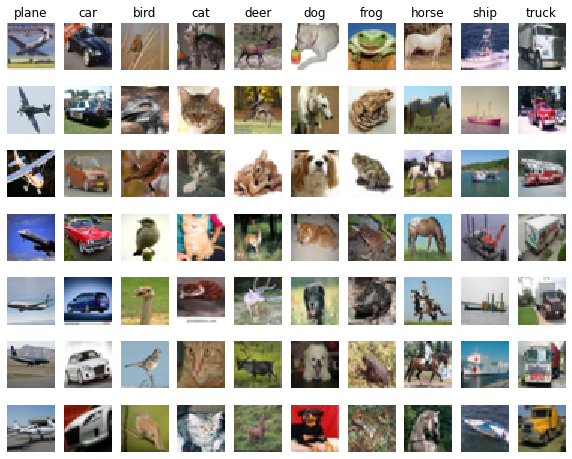

In [5]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [6]:
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
x=np.concatenate((X_train,X_test))
y=np.concatenate((y_train,y_test))

print(x.shape,y.shape)

(5000, 3072) (500, 3072)
(5500, 3072) (5500, 1)


In [7]:
X_train

array([[ 59.,  62.,  63., ..., 123.,  92.,  72.],
       [154., 177., 187., ..., 143., 133., 144.],
       [255., 255., 255., ...,  80.,  86.,  84.],
       ...,
       [167., 163., 145., ...,  42.,  78.,  84.],
       [154., 152., 125., ..., 194., 247., 114.],
       [ 45.,  32.,  21., ..., 156., 142., 100.]])

In [8]:
X_test

array([[158., 112.,  49., ...,  21.,  67., 110.],
       [235., 235., 235., ..., 186., 200., 199.],
       [158., 190., 222., ...,   7.,   8.,   7.],
       ...,
       [ 74., 126., 176., ..., 141., 199., 251.],
       [145., 162., 125., ..., 117., 119., 105.],
       [185., 189., 188., ..., 211., 212., 206.]])

In [9]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [10]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,precision_recall_fscore_support,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

import warnings

warnings.filterwarnings("ignore")

In [11]:
lr=LogisticRegression()

##KNN
knn=KNeighborsClassifier()
  
## Randon Forest  
forest_model=RandomForestClassifier() 

##XGBoost 
xgb=XGBClassifier()

## AdaBoostClassifier
ada = AdaBoostClassifier()

##DecisionTreeClassifier
dt=DecisionTreeClassifier()

##SVC
svc= SVC()

##GaussianNB
NB = GaussianNB()

svm_classifier=svm.SVC(kernel='linear',decision_function_shape='ovo')
svm_classifier1=svm.SVC(kernel='sigmoid',decision_function_shape='ovo')

In [12]:
def Model_cv(X1,Y1,model):
    
    np.random.seed(0)
    X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,test_size=0.3,random_state=100)
    sc=StandardScaler()
    
    X_train=sc.fit_transform(X_train)
    X_test=sc.fit_transform(X_test)
     
    model.fit(X_train,Y_train.ravel())
    #Test data prediction
    y_pred=model.predict(X_test)
    
    # Train data Predcition
    y_train_pred=model.predict(X_train)
    
    
    print(cross_val_score(model,X_train,Y_train,cv=7,scoring='accuracy').mean())
    
    training_Score = accuracy_score(Y_train,y_train_pred.round())
    testing_score = accuracy_score(Y_test,y_pred.round())
    
    print('Metrics for the model',model)
    
    print("Trainig Score_",  training_Score)
    print("Testing Score_",testing_score)

    print(confusion_matrix(Y_train,y_train_pred))
    
    print(confusion_matrix(Y_test,y_pred))
    
    print('Classification report on training',classification_report(Y_train,y_train_pred))
    
    print('Classification report on testing',classification_report(Y_test,y_pred))
    
    print('Precison Score on Training',precision_score(Y_train,y_train_pred.round(),average=None))
 
    print('Precison Score on Testing',precision_score(Y_test,y_pred.round(),average=None))
    
Model_cv(x,y,knn)

0.25922077922077924
Metrics for the model KNeighborsClassifier()
Trainig Score_ 0.44753246753246756
Testing Score_ 0.26666666666666666
[[274   0  33   1  13   2  16   1  45   0]
 [ 50 117  43   5  56   7  26   5  61   7]
 [ 44   4 263  13  43   1  14   5  10   0]
 [ 25   2  85 156  63  13  18   5  13   0]
 [ 27   0  81   6 236   1  10   4  13   0]
 [ 31   3  84  41  84  96  21   3   9   1]
 [ 21   2  96   8  92   5 179   1   2   1]
 [ 49   1  72  18  91   9  29 102  11   0]
 [ 76   1  29   5  23  10   6   1 243   0]
 [ 64  19  51  18  39   9  21  14  85  57]]
[[92  0 26  2 12  2  4  1 37  1]
 [23 11 23  9 24  4  9  2 14  5]
 [21  2 85 10 34  2  6  1 12  0]
 [13  2 42 23 42  8 14  5  6  0]
 [18  0 58  4 73  1 13  3 11  0]
 [15  1 45 26 39 16 14  4  3  0]
 [ 8  0 67  9 45  4 32  0  1  0]
 [21  2 33  7 53  4 11 13  6  1]
 [59  3 21  1  9  1  3  2 82  2]
 [32  8 21  9 18  2 12  5 57 13]]
Classification report on training               precision    recall  f1-score   support

           0  

In [13]:
#(Model_cv(x,y,lr))

In [14]:
Model_cv(x,y,forest_model)

0.38103896103896107
Metrics for the model RandomForestClassifier()
Trainig Score_ 1.0
Testing Score_ 0.3896969696969697
[[385   0   0   0   0   0   0   0   0   0]
 [  0 377   0   0   0   0   0   0   0   0]
 [  0   0 397   0   0   0   0   0   0   0]
 [  0   0   0 380   0   0   0   0   0   0]
 [  0   0   0   0 378   0   0   0   0   0]
 [  0   0   0   0   0 373   0   0   0   0]
 [  0   0   0   0   0   0 407   0   0   0]
 [  0   0   0   0   0   0   0 382   0   0]
 [  0   0   0   0   0   0   0   0 394   0]
 [  0   0   0   0   0   0   0   0   0 377]]
[[ 87   7   9   4   9   7   7   3  30  14]
 [  5  42   6   4   6  11  12   5   5  28]
 [ 17   8  52  14  23   9  21  13   9   7]
 [  8   5  21  23  12  28  38   6   4  10]
 [  8   5  32   9  60  16  27  16   7   1]
 [  3   9  15  39  10  51  18  10   4   4]
 [  4   4  20  10  28   7  85   3   1   4]
 [  6   4  11   7  22  19  13  50   5  14]
 [ 41  17   1   5   5   4   2   3  92  13]
 [  7  18   2   5   1   1  10  10  22 101]]
Classification rep

In [15]:
Model_cv(x,y,ada) 

0.27272727272727276
Metrics for the model AdaBoostClassifier()
Trainig Score_ 0.2961038961038961
Testing Score_ 0.2733333333333333
[[105  15  17  15  16  20   7  24 111  55]
 [ 18 104  15  21  12  22  26   8  46 105]
 [ 37  21  51  13  81  32  98  19  28  17]
 [ 19  27  24  41  48  66  78  24  33  20]
 [ 22   9  29   8  98  43 124  16  11  18]
 [ 10  22  32  37  40 105  59   7  42  19]
 [  4  29  25  26  44  31 214  12   3  19]
 [ 27  21  14  13  70  41  52  69  22  53]
 [ 56  34  10  10   3  20   7   8 172  74]
 [ 39  40   5  14  10   8  19  23  38 181]]
[[40 11  8 12 12  5  4  6 54 25]
 [ 7 23  5  8  6  9 22  2 10 32]
 [19  8 18  7 33 20 40  8  6 14]
 [ 3 12 12 14 10 31 45 15  6  7]
 [ 4  4  9  7 41 20 63 14  9 10]
 [ 5  8 14 14 15 52 22 15 12  6]
 [ 3  6  9 10 25 17 78  8  6  4]
 [ 8  8  5  5 37 19 20 19  9 21]
 [36 14  1  2  2  8  4  6 72 38]
 [14 15 10  5  3  5  5 11 15 94]]
Classification report on training               precision    recall  f1-score   support

           0      

In [16]:
Model_cv(x,y,dt)

0.2275324675324675
Metrics for the model DecisionTreeClassifier()
Trainig Score_ 1.0
Testing Score_ 0.2290909090909091
[[385   0   0   0   0   0   0   0   0   0]
 [  0 377   0   0   0   0   0   0   0   0]
 [  0   0 397   0   0   0   0   0   0   0]
 [  0   0   0 380   0   0   0   0   0   0]
 [  0   0   0   0 378   0   0   0   0   0]
 [  0   0   0   0   0 373   0   0   0   0]
 [  0   0   0   0   0   0 407   0   0   0]
 [  0   0   0   0   0   0   0 382   0   0]
 [  0   0   0   0   0   0   0   0 394   0]
 [  0   0   0   0   0   0   0   0   0 377]]
[[47 16 25 17  7  7  6 14 26 12]
 [ 7 25  8 11  6 10 15 12 11 19]
 [17  8 30 13 25 14 19 20 15 12]
 [ 8 11 22 33 16 20 17  8 12  8]
 [10 12 29 16 42 10 25 23  7  7]
 [ 6 13 19 14 16 42 15 14 11 13]
 [ 6  9 19 23 26 10 42 16  7  8]
 [11 10 17 19 16 13 15 19 14 17]
 [42 18  9 14  8 12  4  6 53 17]
 [12 29  9 10 10 10 11 20 21 45]]
Classification report on training               precision    recall  f1-score   support

           0       1.00      1

In [17]:
Model_cv(x,y,svc)

0.41844155844155845
Metrics for the model SVC()
Trainig Score_ 0.7433766233766234
Testing Score_ 0.4412121212121212
[[297   3   9   2  10   2   8  11  40   3]
 [  3 304   3   3   5   8   4   6  19  22]
 [ 25   2 269   7  30  10  31  10   8   5]
 [  0   4  23 251  23  30  31   2   7   9]
 [ 26   4  41  10 230   6  33  10   6  12]
 [  6   5  22  12  18 274  22   8   3   3]
 [  3   4  32   8  24   7 319   2   3   5]
 [ 10   3  12   7  24   8  14 290   8   6]
 [ 23  15   3   7   7   6   2   3 318  10]
 [  9  14   4   3   7   3   8   6  13 310]]
[[ 83   5  11   5   3  10   6   4  34  16]
 [  1  55   4   5   3  11   8   1   3  33]
 [ 21   2  70  13  21   8  17  10   5   6]
 [  7   4  19  37  13  24  35   3   3  10]
 [  7   4  34  11  72   9  20  13   9   2]
 [  1  11  18  36  12  51  18   8   6   2]
 [  2   2  24  16  25   3  90   1   2   1]
 [  7   3   6   4  22  12  14  62   3  18]
 [ 36  12   3   3   4   6   3   4  96  16]
 [  5  22   3   5   1   1   3  10  15 112]]
Classification report 

In [18]:
Model_cv(x,y,NB)

0.2823376623376624
Metrics for the model GaussianNB()
Trainig Score_ 0.2992207792207792
Testing Score_ 0.31636363636363635
[[175  10   9   2  33  12  26   3  84  31]
 [ 36  63   9  11  33  33  61   4  47  80]
 [ 92   5  38   2 120  20  76  11  19  14]
 [ 59   8  20  29  59  63  88  11  21  22]
 [ 31   2  26   4 180  18  75  11  13  18]
 [ 47   8  20  12  84  99  60   8  21  14]
 [ 34   9  22  11 101  20 180   9   3  18]
 [ 37  16  17  13  92  29  41  52  23  62]
 [ 73  13   7   1  23  35  21   5 175  41]
 [ 41  22   3   7  17  12  36  17  61 161]]
[[93  6  3  0 16  5 10  3 31 10]
 [13 20  2  5 12 14 22  3  8 25]
 [35  2 12  2 55  5 40  4 10  8]
 [20  4 10  4 27 23 50  4  3 10]
 [12  1  8  0 84 13 40  8 11  4]
 [15  4 10  5 23 52 34  4 10  6]
 [14  0 10  3 47  3 74  3  4  8]
 [18  4  6  2 47 15 18 15  9 17]
 [44  5  2  3  7 10  6  3 80 23]
 [18 10  7  4  5  2 14  8 21 88]]
Classification report on training               precision    recall  f1-score   support

           0       0.28   

In [19]:
Model_cv(x,y,xgb)

0.4275324675324676
Metrics for the model XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Trainig Score_ 1.0
Testing Score_ 0.4484848484848485
[[385   0   0   0   0   0   0   0   0   0]
 [  0 377   0   0   0   0   0   0   0   0]
 [  0   0 397   0   0   0   0   0   0   0]
 [  0   0   0 380   0   0   0   0   0   0]
 [  0   0   0   0 378   0   0   0   0   0]
 [  0   0   0   0   0 373   0   0   0   0]
 [  0   0   0   0   0

In [20]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [21]:
sm=SMOTE(random_state=100,k_neighbors=6)

In [22]:
x_res,y_res=sm.fit_sample(x,y)

In [23]:
x_res.shape,y_res.shape

((5770, 3072), (5770,))

In [24]:
np.random.seed(0)
X1_train,X1_test,Y1_train,Y1_test=train_test_split(x_res,y_res,test_size=0.3,random_state=100)
sc=StandardScaler()
X1_train=sc.fit_transform(X1_train)
X1_test=sc.fit_transform(X1_test)

In [25]:
def Model(z,a,b,c,d):
    
    #Fitting the Classification Models
    z.fit(a,c)
    y_train_pred=z.predict(a)
    y_test_pred=z.predict(b)
    
    #cross Validation Score
    cv_z_score=(cross_val_score(z,a,c,scoring='accuracy',cv=7)).mean()
    
    #Accuracy of the training and testing
    training_Score = accuracy_score(c,y_train_pred)
    testing_score = accuracy_score(d,y_test_pred)
    print("cv_score", cv_z_score) 
    print("TRAINING SCORE",  training_Score)
    print("TESTING SCORE",testing_score)
    print("\n")
    print('--'*30)
    print('\n')
    print("TRAINING CONFUSION MATRIX")
    print(confusion_matrix(c,y_train_pred))
    print("\n")
    print('--'*30)
    print('\n')
    print("TESTING  CONFUSION MATRIX")
    print(confusion_matrix(d,y_test_pred))
    print('\n')
    print('--'*30)
    print('\n')
    print('CLASSIFICATION REPORT ON TRAINING')
    print(classification_report(c,y_train_pred))
    print('\n')
    print('--'*30)
    print('\n')
    print('CLASSIFICATION REPORT ON TESTING')
    print(classification_report(d,y_test_pred))
    print("\n")
    print('--'*30)
    print('\n')
    print('Precison Score on Training')
    print(precision_score(c,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('Precison Score on Testing')
    print(precision_score(d,y_test_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('recall Score on Training')
    print(recall_score(c,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('recall Score on Testing')
    print(recall_score(d,y_test_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('f1 Score on Training')
    print(f1_score(c,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('f1 Score on Testing')
    print(f1_score(d,y_test_pred,average=None))

In [26]:
#Model(lr,X_train,X_test,y_train,y_test)

In [27]:
Model(knn,X_train,X_test,y_train,y_test)

cv_score 0.27100378612983655
TRAINING SCORE 0.4534
TESTING SCORE 0.278


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[354   0  36   3  21   3  15   3  70   0]
 [ 72 150  35  11  72   8  30   4  69   9]
 [ 50   4 322  13  86   4  16   1  23   0]
 [ 44   2  92 179  85  24  36   4  19   1]
 [ 27   2 102   8 349   1  15   3  11   1]
 [ 36   1  98  45 107 150  29   6  13   3]
 [ 17   2 131  14 140  10 199   1   5   0]
 [ 53   2  99  23 132   7  23 126  17   4]
 [ 96   5  27   7  25   4   9   2 342   3]
 [ 87  21  57  16  58  10  27  14 112  96]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[28  0  8  1  5  0  0  0 14  1]
 [ 9  5  2  2  8  1  2  0 11  1]
 [ 9  1 29  1  6  2  2  0  1  0]
 [ 3  0 17  6 11  5  6  0  1  0]
 [ 6  0 12  2 14  0  2  0  4  0]
 [ 9  0 13  6 11  5  2  0  2  0]
 [ 4  0 20  1 17  0 12  0  0  0]
 [ 8  1  8  2 17  2  2  2  4  1]
 [14  0  3  0  5  2  0  0 33  0]
 [ 8  2  9  2 11  0

In [28]:
Model(forest_model,X_train,X_test,y_train,y_test)

cv_score 0.39379835850424083
TRAINING SCORE 1.0
TESTING SCORE 0.364


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[505   0   0   0   0   0   0   0   0   0]
 [  0 460   0   0   0   0   0   0   0   0]
 [  0   0 519   0   0   0   0   0   0   0]
 [  0   0   0 486   0   0   0   0   0   0]
 [  0   0   0   0 519   0   0   0   0   0]
 [  0   0   0   0   0 488   0   0   0   0]
 [  0   0   0   0   0   0 519   0   0   0]
 [  0   0   0   0   0   0   0 486   0   0]
 [  0   0   0   0   0   0   0   0 520   0]
 [  0   0   0   0   0   0   0   0   0 498]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[22  2  4  1  2  0  2  0 14 10]
 [ 1 18  1  0  0  1  4  3  5  8]
 [ 9  2 17  0  8  5  5  2  1  2]
 [ 2  3  8 10  4 13  4  1  1  3]
 [ 3  2 10  1  9  0  6  4  2  3]
 [ 3  1  4 10  6 12  4  2  3  3]
 [ 1  2  6  1 13  2 26  1  1  1]
 [ 5  5  5  2  7  3  3  7  2  8]
 [ 9  3  0  0  4  4  0  0 32  5]
 [ 5  7  1  2  0  0  0

In [29]:
Model(ada,X_train,X_test,y_train,y_test)

cv_score 0.2749888766695489
TRAINING SCORE 0.3164
TESTING SCORE 0.294


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[160  28  23  12  21  29  10  36 138  48]
 [ 28 152  17  13   7  34  30  11  54 114]
 [ 40  32  67  27  81  57 118  37  43  17]
 [ 29  36  33  60  46  72 117  38  25  30]
 [ 25  16  38  22 132  59 162  31  20  14]
 [ 31  35  37  28  46 137  86  33  39  16]
 [  8  25  31  33  61  43 274  22   2  20]
 [ 42  27  23  14  72  47  72 109  24  56]
 [ 77  36  13   5  17  31   5  14 234  88]
 [ 35  58   8  11  10  10  31  29  49 257]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[24  1  1  0  3  4  2  1 12  9]
 [ 2 14  1  0  1  3  4  1  5 10]
 [ 3  4  9  0  8  7 11  3  5  1]
 [ 1  6  2  2  3 13 13  4  3  2]
 [ 3  4  3  0  8  1 11  5  2  3]
 [ 7  3  5  2  5  9  7  5  3  2]
 [ 1  5  0  2  3  6 30  2  1  4]
 [ 7  3  4  0  6  2  7 10  3  5]
 [13  2  1  0  0  6  0  3 23  9]
 [ 7 12  1  0  1  2 

In [30]:
Model(dt,X_train,X_test,y_train,y_test)

cv_score 0.23719809602162542
TRAINING SCORE 1.0
TESTING SCORE 0.18


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[505   0   0   0   0   0   0   0   0   0]
 [  0 460   0   0   0   0   0   0   0   0]
 [  0   0 519   0   0   0   0   0   0   0]
 [  0   0   0 486   0   0   0   0   0   0]
 [  0   0   0   0 519   0   0   0   0   0]
 [  0   0   0   0   0 488   0   0   0   0]
 [  0   0   0   0   0   0 519   0   0   0]
 [  0   0   0   0   0   0   0 486   0   0]
 [  0   0   0   0   0   0   0   0 520   0]
 [  0   0   0   0   0   0   0   0   0 498]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[13  8  3  3  4  1  1  7  8  9]
 [ 2  7  3  2  7  3  1  1  5 10]
 [ 4  5 11  7  8  4  4  4  1  3]
 [ 3  6 11  4  3 10  5  6  1  0]
 [ 5  1  4  6  7  3  2  7  4  1]
 [ 2  4  3 11 11  5  5  3  3  1]
 [ 2  3  9  9  9  7  5  6  1  3]
 [ 7  4  1  6  6  4  5 10  2  2]
 [13  9  5  1  4  2  1  1 13  8]
 [ 6  8  4  4  0  3  2 

In [31]:
Model(svc,X_train,X_test,y_train,y_test)

cv_score 0.43240233156199537
TRAINING SCORE 0.7186
TESTING SCORE 0.404


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[363   8  17   5  10   8  11  11  57  15]
 [  5 356   6   3   7  11   5   7  24  36]
 [ 34   3 326  11  56  10  37  20  14   8]
 [  6   3  30 299  27  39  56   3  10  13]
 [ 30   6  42  11 335   9  41  21  11  13]
 [ 11   6  33  20  22 335  36  12   6   7]
 [  4   8  42   9  40   9 393   4   5   5]
 [ 16   8  19   9  41   6  13 353  10  11]
 [ 28  18   7   4   8  12   4   5 420  14]
 [ 12  16   6  12   5   2  11   7  14 413]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[24  1  1  1  1  2  2  3 17  5]
 [ 3 21  1  1  1  0  0  2  5  7]
 [ 6  2 18  4  5  7  6  2  1  0]
 [ 2  3  5 12  5 10  7  3  0  2]
 [ 3  2  8  0  8  3  9  3  1  3]
 [ 2  2  3 10  6 17  4  3  1  0]
 [ 2  2  6  2 13  1 24  2  1  1]
 [ 3  2  5  4  5  5  4 14  1  4]
 [ 7  2  1  1  1  3  0  1 35  6]
 [ 4  6  0  1  0  0

In [32]:
Model(NB,X_train,X_test,y_train,y_test)

cv_score 0.29439775910364147
TRAINING SCORE 0.3032
TESTING SCORE 0.29


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[233  17  10   3  40  18  31   8 112  33]
 [ 46  77  14  14  34  49  70   6  50 100]
 [113  11  45   5 148  20 113  15  28  21]
 [ 76  14  25  33  68  84 123  13  23  27]
 [ 37   4  33   5 236  27 117  14  25  21]
 [ 59  12  28  17  90 144  87  12  22  17]
 [ 50  11  28  10 126  23 231  12   6  22]
 [ 53  17  23   9 121  43  55  57  30  78]
 [102  17   8   3  27  40  25   7 233  58]
 [ 53  38  12   6  14  14  44  24  66 227]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[23  1  2  1  1  0  6  0 13 10]
 [ 2  8  0  0  4  4  9  1  7  6]
 [14  0  6  1 12  5  8  1  3  1]
 [ 7  2  2  1 10  8 12  2  1  4]
 [ 5  0  3  1 13  1 10  2  3  2]
 [10  0  3  2  9 12  5  1  4  2]
 [ 3  1  5  0 14  1 26  0  1  3]
 [ 7  4  3  4 10  3  3  3  4  6]
 [ 8  3  3  1  1  5  0  1 30  5]
 [ 3  3  1  2  1  1 

In [33]:
Model(xgb,X_train,X_test,y_train,y_test)

cv_score 0.43939617805164016
TRAINING SCORE 1.0
TESTING SCORE 0.458


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[505   0   0   0   0   0   0   0   0   0]
 [  0 460   0   0   0   0   0   0   0   0]
 [  0   0 519   0   0   0   0   0   0   0]
 [  0   0   0 486   0   0   0   0   0   0]
 [  0   0   0   0 519   0   0   0   0   0]
 [  0   0   0   0   0 488   0   0   0   0]
 [  0   0   0   0   0   0 519   0   0   0]
 [  0   0   0   0   0   0   0 486   0   0]
 [  0   0   0   0   0   0   0   0 520   0]
 [  0   0   0   0   0   0   0   0   0 498]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[28  1  4  0  3  1  2  2  7  9]
 [ 1 19  2  1  1  2  1  2  3  9]
 [ 5  2 20  7  6  5  3  2  1  0]
 [ 1  1  7 14  3 11  9  1  0  2]
 [ 1  0  6  2 15  3  6  4  1  2]
 [ 1  0  7  9  6 17  1  1  4  2]
 [ 0  2  4  0  8  1 34  2  2  1]
 [ 0  1  2  8  8  6  4 12  2  4]
 [10  5  0  4  0  1  0  1 36  0]
 [ 4  4  1  2  0  1  1

In [34]:
from lazypredict.Supervised import LazyClassifier 

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(x_res,y_res,test_size=0.3,random_state=100)

In [36]:
LC=LazyClassifier(predictions=True)

In [37]:
models,prediction=LC.fit(X1_train,X1_test,Y1_train,Y1_test)    

100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [51:08<00:00, 105.80s/it]


In [38]:
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.49               0.49    None      0.49   
XGBClassifier                      0.48               0.48    None      0.48   
NuSVC                              0.47               0.47    None      0.47   
SVC                                0.46               0.46    None      0.46   
ExtraTreesClassifier               0.46               0.46    None      0.45   
RandomForestClassifier             0.43               0.43    None      0.43   
BaggingClassifier                  0.36               0.36    None      0.36   
SGDClassifier                      0.33               0.33    None      0.33   
GaussianNB                         0.33               0.32    None      0.30   
BernoulliNB                        0.31               0.31    None      0.28   
NearestCentroid                    0.30 

In [39]:
import pandas as pd
df=pd.DataFrame(models)
df

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.49,0.49,None,0.49,245.98
XGBClassifier,0.48,0.48,None,0.48,191.61
NuSVC,0.47,0.47,None,0.47,116.17
SVC,0.46,0.46,None,0.46,80.42
ExtraTreesClassifier,0.46,0.46,None,0.45,13.58
RandomForestClassifier,0.43,0.43,None,0.43,19.29
BaggingClassifier,0.36,0.36,None,0.36,132.88
SGDClassifier,0.33,0.33,None,0.33,136.76
GaussianNB,0.33,0.32,None,0.30,3.00


In [40]:
Y= y_train
Y1=label_binarize(y_res,classes=[5,6,7,4,8,3])
n_classes=Y1.shape[1]

In [41]:
def roc_curves(x,Y):
    Y1=label_binarize(Y,classes=[5,6,7,4,8,3])
    n_classes = Y1.shape[1]
    np.random.seed(0)
    X_train, X_test, Y_train, Y_test = train_test_split(x_res, Y1, test_size=.3,random_state=100)
    clf = OneVsRestClassifier(x)
    
    clf.fit(X_train,Y_train)
    
    y_score = clf.predict_proba(X_test)
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    print(roc_auc)
    for i in range(n_classes):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

{0: 0.6913780758940347, 1: 0.714516222629149, 2: 0.806928597784643, 3: 0.6400808884014259, 4: 0.6624260517090271, 5: 0.732615592550927}


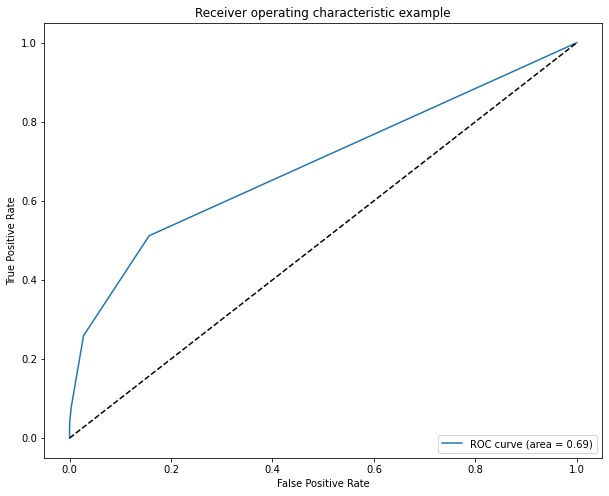

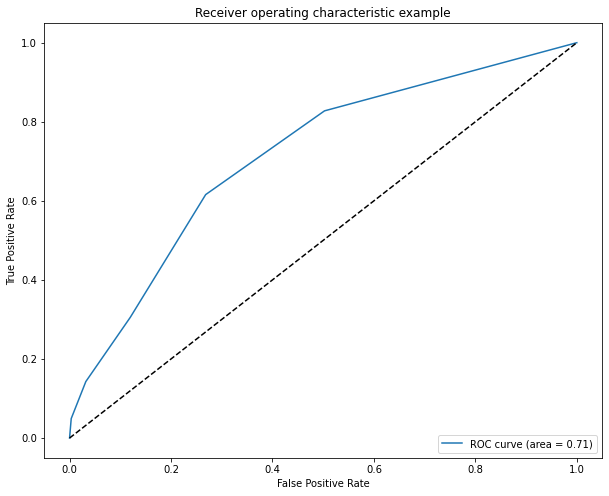

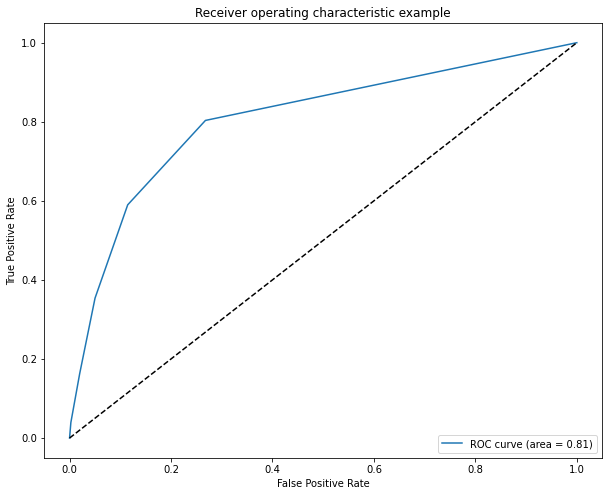

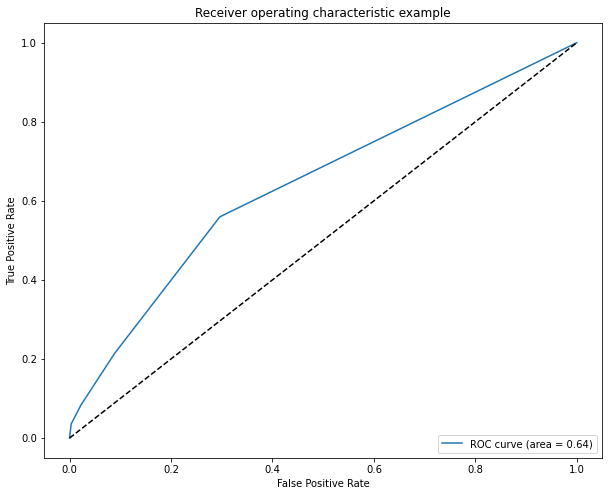

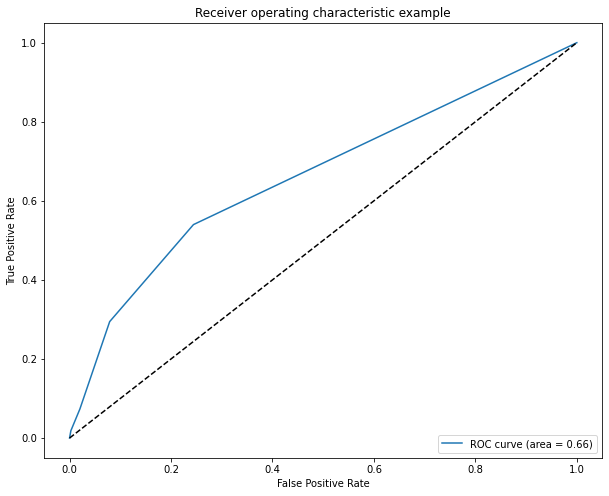

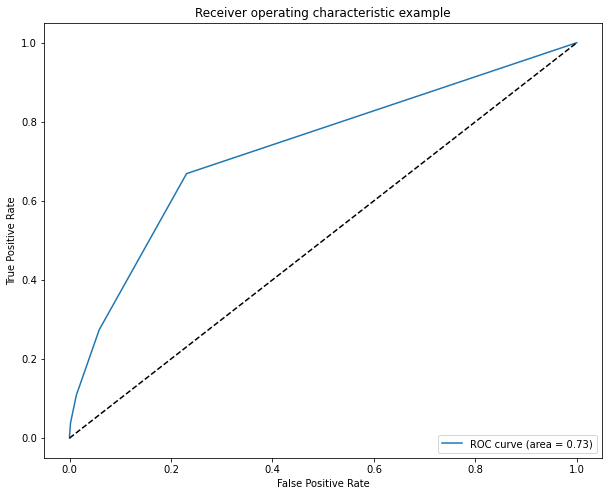

In [42]:
roc_curves(knn,Y1)

{0: 0.5675340091193428, 1: 0.5555186598921931, 2: 0.6211229443556148, 3: 0.5618145050726625, 4: 0.5635857487166646, 5: 0.6068214375318673}


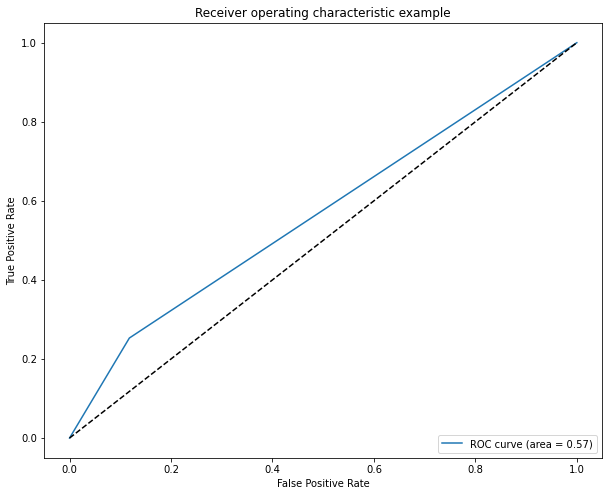

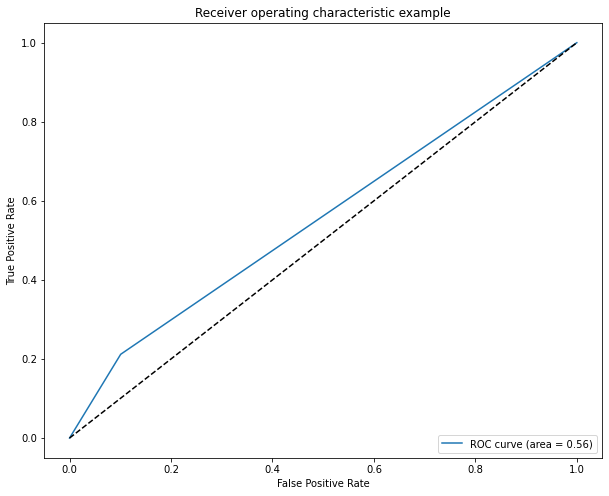

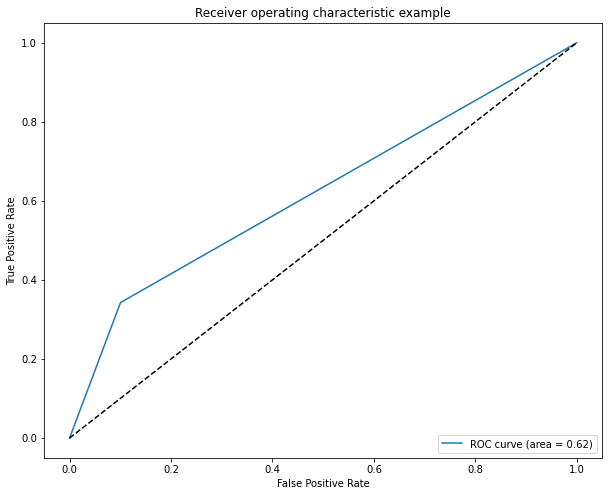

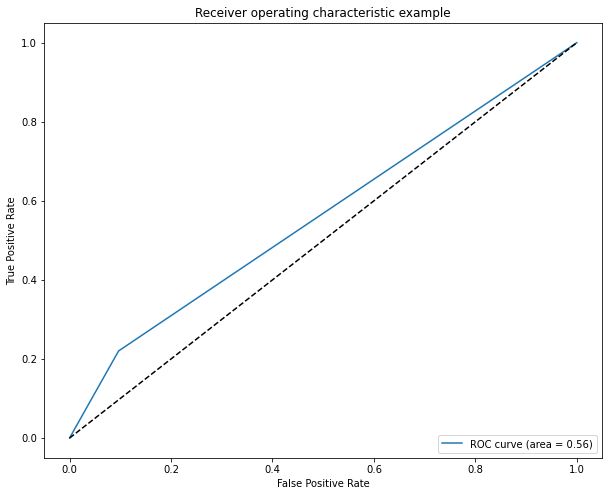

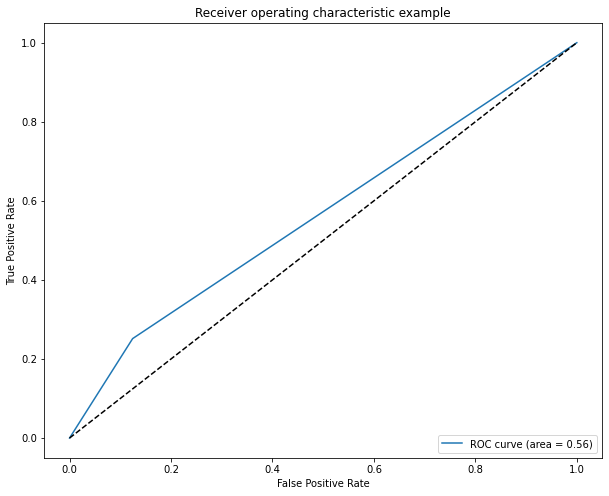

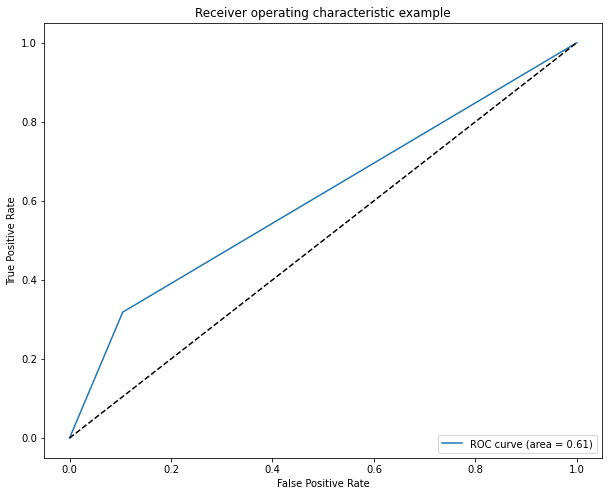

In [43]:
roc_curves(dt,Y1)

{0: 0.7340430342540604, 1: 0.7117356149898125, 2: 0.8689904280949522, 3: 0.7730345337111172, 4: 0.7242785150870165, 5: 0.8037921155075712}


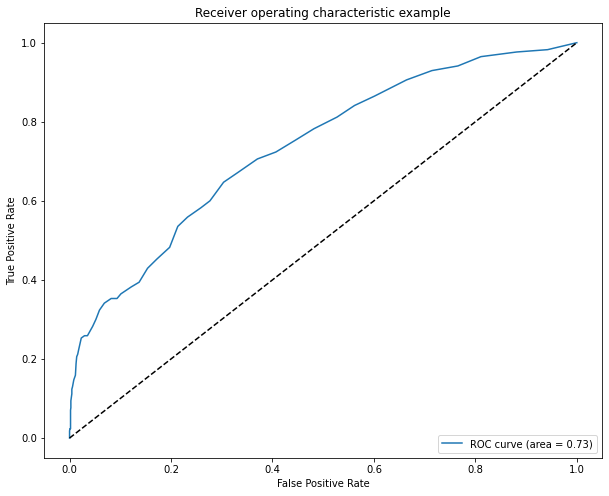

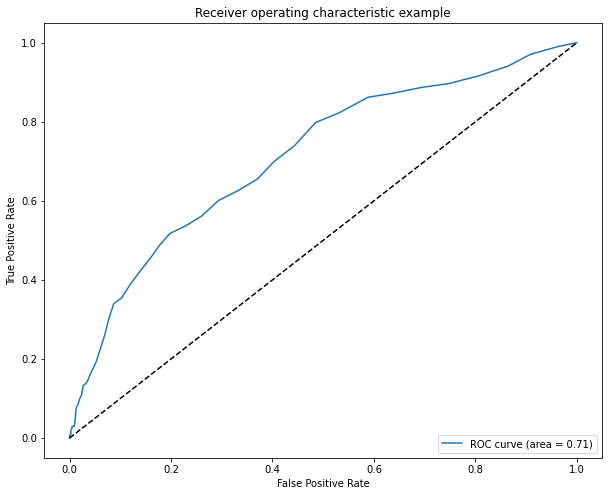

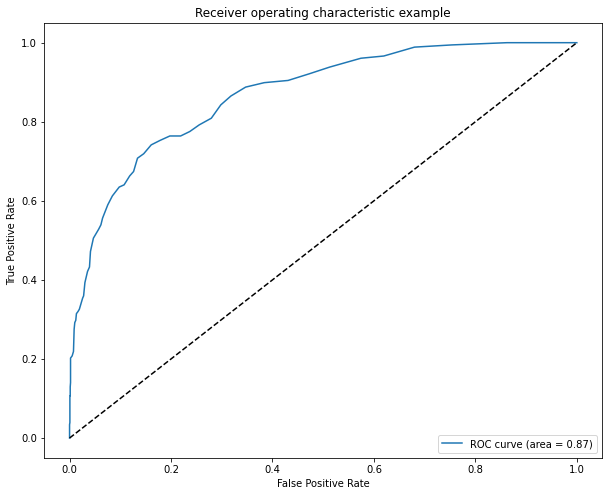

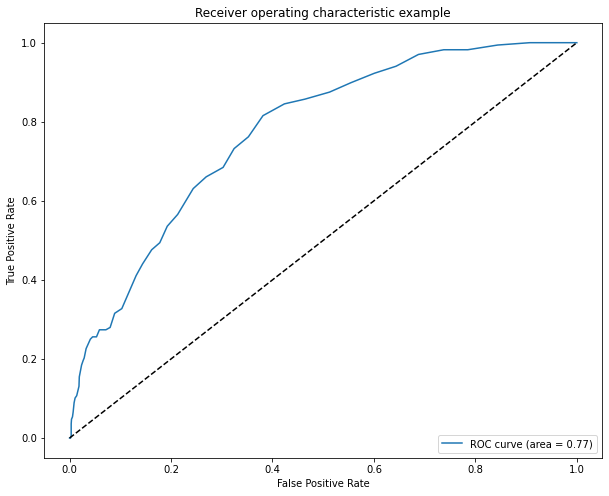

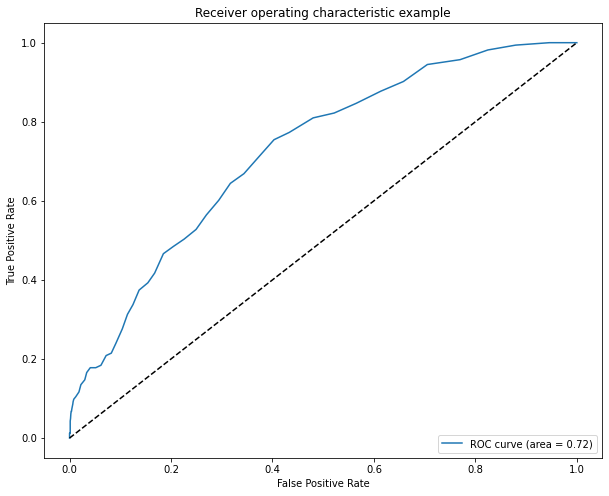

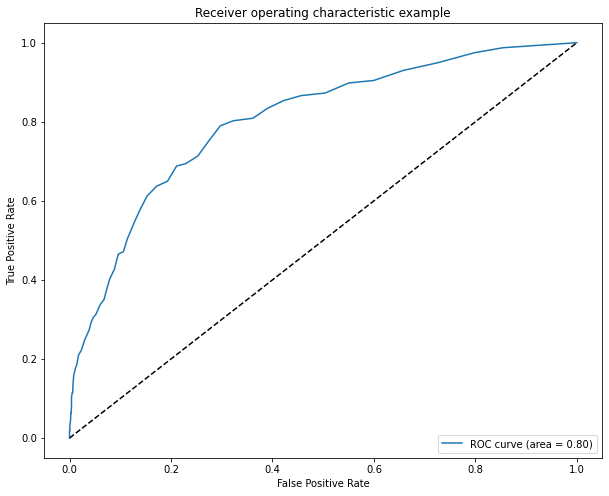

In [44]:
roc_curves(forest_model,Y1)

{0: 0.6942118551456458, 1: 0.7189248961906481, 2: 0.8308095241540476, 3: 0.8087221612893399, 4: 0.6747448979591837, 5: 0.7283180504860027}


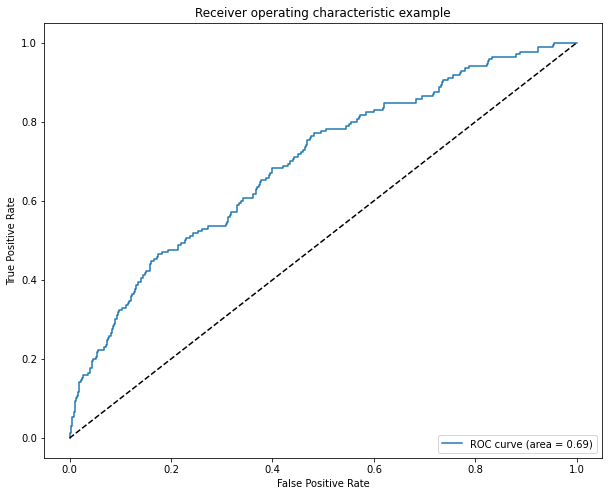

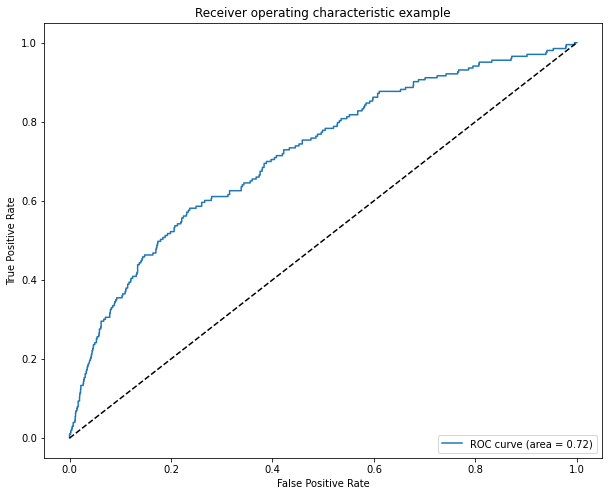

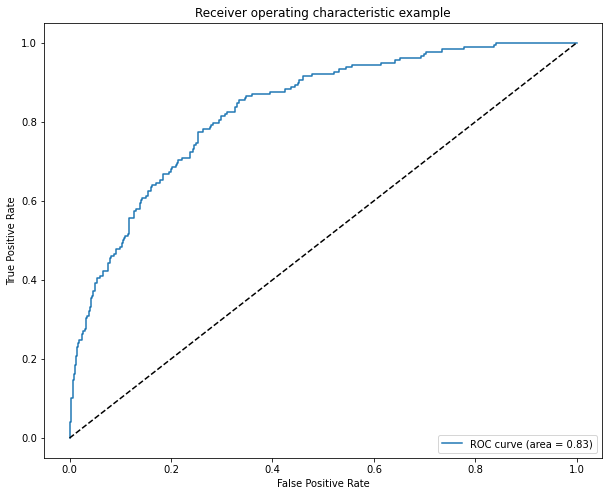

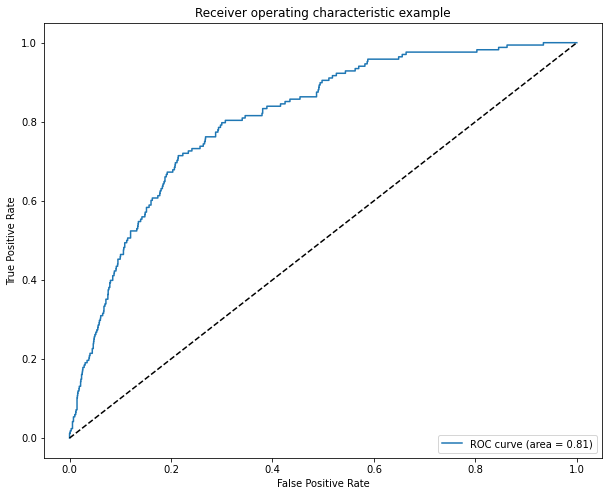

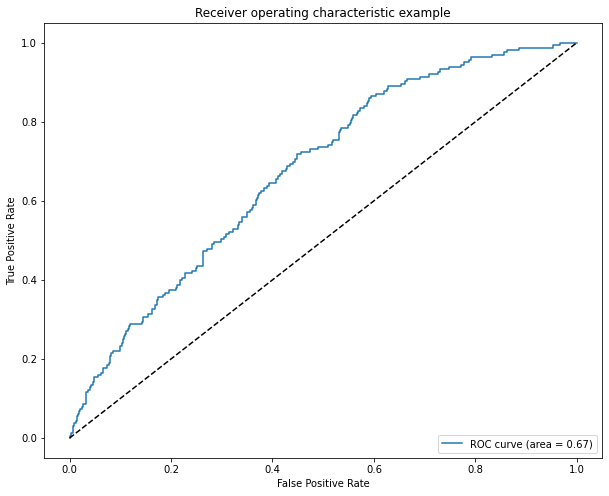

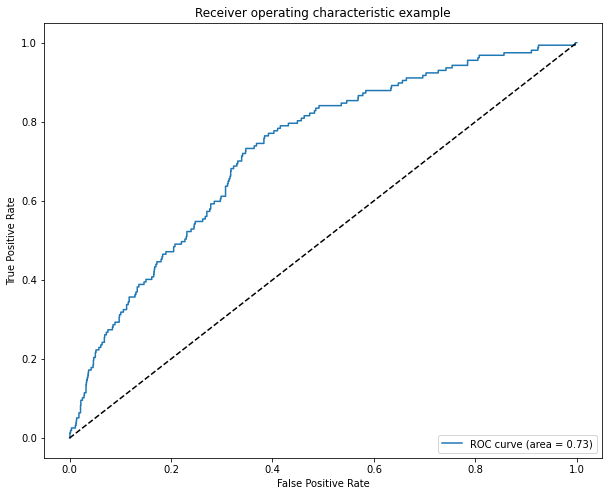

In [45]:
roc_curves(ada,Y1)

{0: 0.6845008855560162, 1: 0.6920005545095813, 2: 0.7649239963246199, 3: 0.7203904274441704, 4: 0.6630970639789658, 5: 0.6758754926796106}


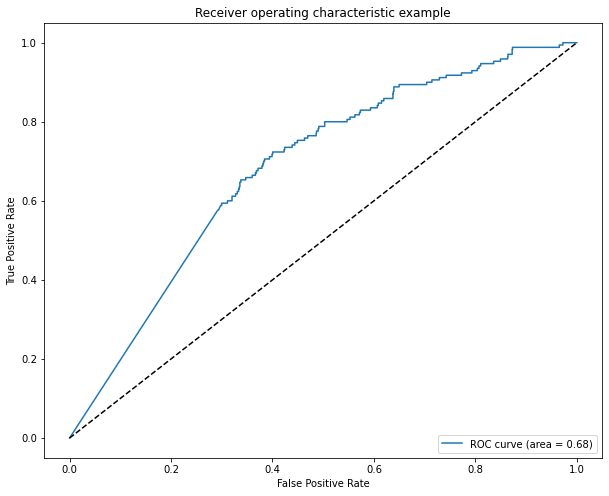

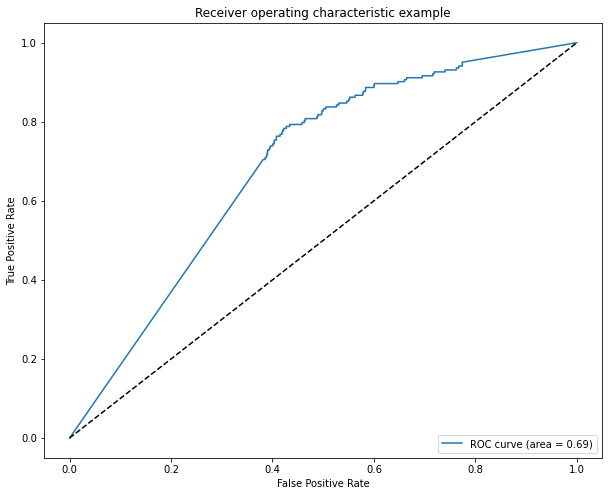

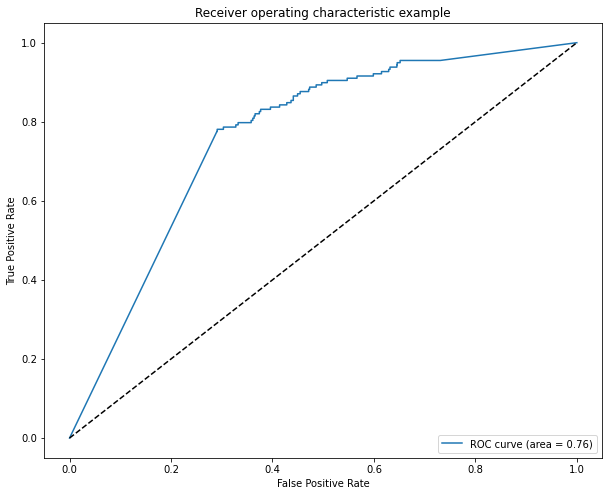

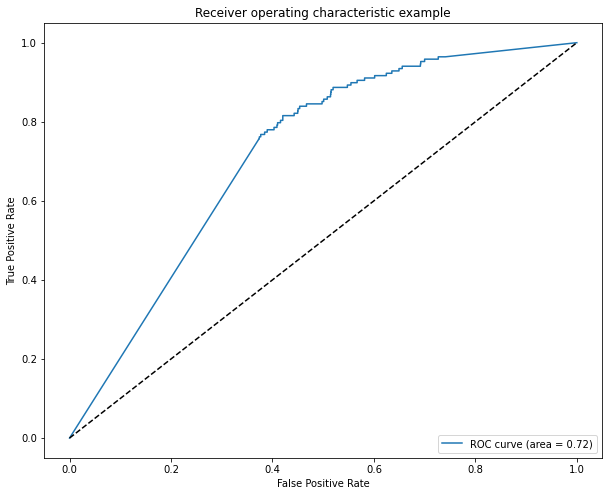

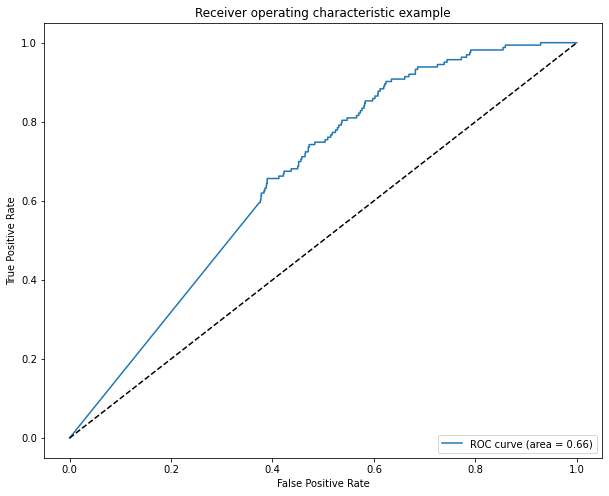

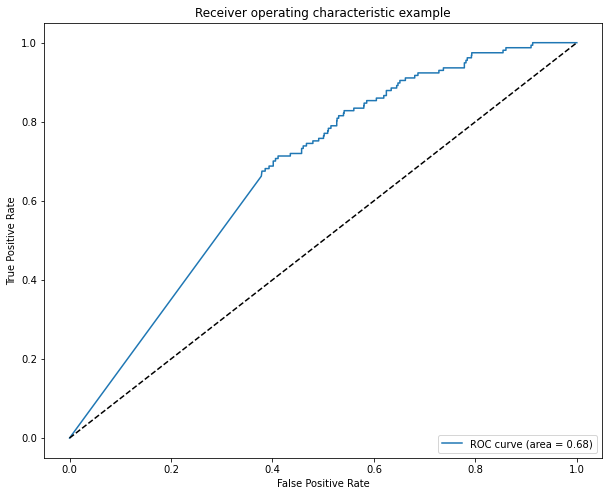

In [46]:
roc_curves(NB,Y1)

In [47]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.335, total=  47.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   46.9s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.338, total=  46.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.340, total=  46.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.335, total=  47.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.332, total=  46.5s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.335, total=  47.3s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.338, total=  46.7s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.340, total=  45.9s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.335, total=  47.7s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 121.3min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [48]:
print(grid.best_params_) 

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [49]:
svm=svm.SVC(C=0.1,kernel='rbf',gamma=1)

In [50]:
Model_cv(X_train,Y_train,svc) 

0.42200732834715593
Metrics for the model SVC()
Trainig Score_ 0.763707110010612
Testing Score_ 0.41336633663366334
[[213   3   8   4   4   2   4   4  28   8]
 [  1 241   1   3   5   2   4   3   7  11]
 [ 21   4 198   6  21   4  19  10   7   3]
 [  3   5  15 193  15  19  23   5   5   6]
 [ 11   2  35   5 157   6  21   9   7   7]
 [  6   2  16  12   9 217  15   7   4   1]
 [  0   4  20   5  17   5 237   1   5   2]
 [  9   1   9   3  17   3   9 224   5   5]
 [  9   9   3   5   0   9   0   5 235   6]
 [  6   9   2   4   1   3   2   2   5 244]]
[[50  7 10  2  4  1  5  6 26  8]
 [ 2 55  5  8  4  7  3  3 14 38]
 [16  5 42  5 12 10 12  7  6  1]
 [ 2  6 13 38 14 23 16  2  1 10]
 [ 7  2 22  4 34  7 19  9  2  8]
 [ 2  1 18 22 11 47 13  5  6  6]
 [ 4  3 18  6 13  6 59  1  0  3]
 [ 9  4  6  5 10  9  6 56  3 14]
 [17  8  6  3  3  4  1  0 70  6]
 [ 8 18  4  5  6  1  6  6 11 50]]
Classification report on training               precision    recall  f1-score   support

           0       0.76      0.77

In [51]:
Model_cv(X_test,Y_test,svc)

0.374896779521057
Metrics for the model SVC()
Trainig Score_ 0.7572254335260116
Testing Score_ 0.38846153846153847
[[ 88   2   3   2   8   2   1   0  18   5]
 [  2  84   0   0   3   4   0   1   6   8]
 [  8   0  68   1  29   1   5   1   3   0]
 [  3   0   3  72  12   9   5   2   0   3]
 [  6   0   2   0 120   1   7   3   3   2]
 [  1   0   6   0   8  97   6   3   1   2]
 [  3   1   3   1  15   1  81   1   3   3]
 [  1   1   2   0  19   2   3  79   3   6]
 [  4   2   2   0   3   0   0   0 116   3]
 [  1   1   1   1   1   0   1   0   5 112]]
[[26  1  2  0  3  1  1  3 11  3]
 [ 1 19  2  1  6  5  3  1  3 11]
 [ 7  0  8  1 15  4  7  3  3  4]
 [ 4  0  2  6  7 19  9  3  1  3]
 [ 4  0  2  1 34  5  3  3  4  3]
 [ 1  0  1  1 13  6  3  3  2  3]
 [ 2  0  7  6 12  2 25  0  0  2]
 [ 1  1  2  3 14  8  2 13  1  9]
 [ 4  4  0  1  3  3  0  1 31  1]
 [ 3  7  0  0  3  3  1  3  7 34]]
Classification report on training               precision    recall  f1-score   support

           0       0.75      0.68 